In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [18]:
# All settings are at the top for easy changes
CONFIG = {
    "symbols": ['AMZN', '^GSPC', '^VIX', 'SHOP', '^TNX'],
    "feature_cols": ['GSPC', 'VIX', 'SHOP', 'TNX'], 
    "target_col": 'AMZN',
    "start_date": '2017-01-01',
    "end_date": '2022-12-31',
    "train_split_ratio": 0.8,
    "refit_interval": 20
}

In [19]:
print("Fetching data...")
data = yf.download(CONFIG['symbols'], start=CONFIG['start_date'], end=CONFIG['end_date'])['Close']
data = data.ffill().dropna()
data.columns = [col.replace('^', '') for col in CONFIG['symbols']]

# Immediately inspect the data
data.head()

/tmp/ipykernel_371944/1102727090.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(CONFIG['symbols'], start=CONFIG['start_date'], end=CONFIG['end_date'])['Close']
[*********************100%***********************]  5 of 5 completed

Fetching data...


,AMZN,GSPC,VIX,SHOP,TNX
Date,,,,,
2017-01-03,37.683498,4.282,2257.830078,2.450,12.85
2017-01-04,37.859001,4.414,2270.750000,2.452,11.85
2017-01-05,39.022499,4.768,2269.000000,2.368,11.67
2017-01-06,39.799500,4.690,2276.979980,2.418,11.32
2017-01-09,39.846001,4.718,2268.899902,2.376,11.56


In [20]:
print("Preparing data...")
train_size = int(len(data) * CONFIG['train_split_ratio'])
train_df, test_df = data.iloc[:train_size], data.iloc[train_size:]

y_train_log = np.log(train_df[CONFIG['target_col']])
y_test = test_df[CONFIG['target_col']]

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(train_df[CONFIG['feature_cols']]),
                       index=train_df.index, columns=CONFIG['feature_cols'])
X_test = pd.DataFrame(scaler.transform(test_df[CONFIG['feature_cols']]),
                      index=test_df.index, columns=CONFIG['feature_cols'])

Preparing data...


In [21]:
# This cell can be re-run independently if you want to experiment with model parameters
print("Finding best ARIMA order...")
model_auto = auto_arima(y_train_log,
                        exogenous=X_train,
                        seasonal=False,
                        stationary=True,
                        trace=True,
                        stepwise=True,
                        suppress_warnings=True,
                        error_action='ignore')

# The summary is printed directly in the notebook output
best_order = model_auto.order
print(f"\nBest Order: {best_order}")
model_auto.summary()

Finding best ARIMA order...
Performing stepwise search to minimize aic


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-6175.761, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1429.244, Time=0.11 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-174.814, Time=0.18 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=7090.013, Time=0.01 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-6176.640, Time=0.44 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-1450.565, Time=0.35 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6178.309, Time=0.37 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6176.610, Time=0.49 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6180.277, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.18 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.23 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-6157.328, Time=0.50 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-6178.291, Time=0.52 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.28 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.47 sec


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.79 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0]          
Total fit time: 6.299 seconds

Best Order: (1, 0, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1208
Model:               SARIMAX(1, 0, 1)   Log Likelihood                3093.138
Date:                Wed, 23 Jul 2025   AIC                          -6180.277
Time:                        18:58:46   BIC                          -6164.986
Sample:                             0   HQIC                         -6174.519
                               - 1208                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000    4.4e-05   2.28e+04      0.000       1.000       1.000
ma.L1         -0.0402      0.020     -1.996      0.046      -0.080      -0.001
sigma2         0.0003   7.97e-06     43.434      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               960.82
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               1.74   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
print(f"Running rolling forecast (refitting every {CONFIG['refit_interval']} days)...")
history_log = list(y_train_log)
exog_history = X_train.copy()
predictions = []
model_fit = None

for i in range(len(y_test)):
    try:
        # Refit the model periodically
        if i % CONFIG['refit_interval'] == 0 or model_fit is None:
            print(f"Refitting model at step {i}...")
            model = ARIMA(history_log, exog=exog_history, order=best_order)
            
            # THE FIX: Remove method_kwargs, as it's no longer needed for this model.
            model_fit = model.fit()

        # Forecast the next step
        next_exog = X_test.iloc[i:i+1]
        forecast_log = model_fit.forecast(steps=1, exog=next_exog)
        prediction = np.exp(forecast_log.iloc[0])
        predictions.append(prediction)

        # Update history for the next iteration
        history_log.append(np.log(y_test.iloc[i]))
        exog_history = pd.concat([exog_history, next_exog])

    except Exception as e:
        print(f"Forecast failed at step {i}: {e}")
        predictions.append(np.nan)

final_predictions = pd.Series(predictions, index=y_test.index).dropna()

Running rolling forecast (refitting every 20 days)...
Refitting model at step 0...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Lik

Refitting model at step 20...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 40...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is avai

Refitting model at step 60...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is avai

Refitting model at step 80...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is avai

Refitting model at step 100...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 120...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 140...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 160...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No suppor

Refitting model at step 180...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 200...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 220...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 240...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 260...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is avai

Refitting model at step 280...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

Refitting model at step 300...


/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/michael/AI-stock-prediction-algos/.venv/lib64/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Predi

In [23]:
aligned_actuals = y_test.loc[final_predictions.index]
rmse = np.sqrt(mean_squared_error(aligned_actuals, final_predictions))
mae = mean_absolute_error(aligned_actuals, final_predictions)
mape = mean_absolute_percentage_error(aligned_actuals, final_predictions)

print("\n--- Rolling Forecast Performance ---")
print(f"RMSE  {rmse:.2f}") # Root Mean Squared Error
print(f"MAE:   {mae:.2f}") # Mean Absolute Error
print(f"MAPE:  {mape:.2%}") # Mean Absolute Percentage Error



--- Rolling Forecast Performance ---
RMSE  6.22
MAE:   4.53
MAPE:  3.58%


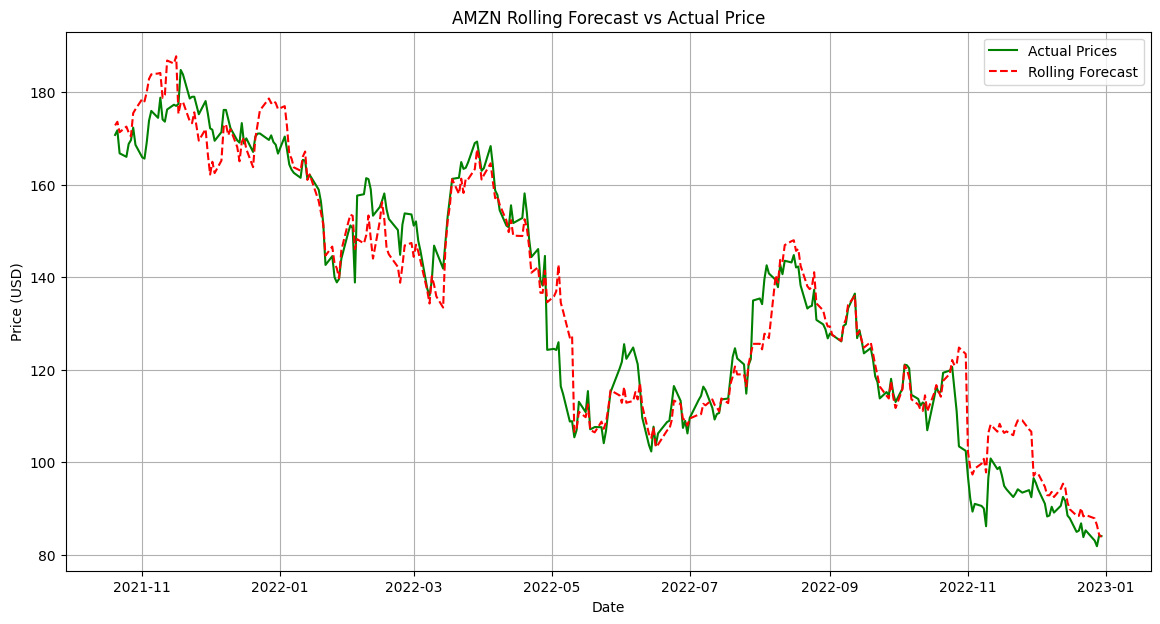

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(aligned_actuals, label='Actual Prices', color='green')
plt.plot(final_predictions, label='Rolling Forecast', linestyle='--', color='red')
plt.title(f'{CONFIG["target_col"]} Rolling Forecast vs Actual Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()